<h1> <b> |--> Import Liberaies <--|


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------------------------------------------------------------

<h1> <b> |--> Exploring Dataset <--|



# -------------------------------------------------------------


<h2> Load Dataset

In [2]:
df = pd.read_csv(r'F:\AI Project\covid_19_data.csv\covid_19_data.csv')

<h2>  Show me Size


In [3]:
df.shape

(306429, 8)

<h2>    Show Dataset

In [4]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


<h2> Show Country/Region Column

In [5]:
df['Country/Region']

0         Mainland China
1         Mainland China
2         Mainland China
3         Mainland China
4         Mainland China
               ...      
306424           Ukraine
306425       Netherlands
306426    Mainland China
306427           Ukraine
306428       Netherlands
Name: Country/Region, Length: 306429, dtype: object

<h2> Show me number of missing value for each column


In [6]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

<h2>  Replace Nan --> 0

In [7]:
df.loc[:, 'Province/State'] = df['Province/State'].fillna(0)

<h2>Show me number of missing value for each column

In [8]:
df.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

<h2>  Show all duplicated Columns


In [9]:
df[df.duplicated(keep=False)]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


<h2> Show Dataframe

In [10]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


<h2> Drop SNo Column

In [11]:
df.drop(['SNo'], axis=1, inplace=True)

<h2> Show DataFrame

In [12]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


<h2>Show Diplicat Columns

In [13]:
df[df.duplicated(keep=False)]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
49,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0
53,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0


<h2> Drop Duplicates Columns

In [14]:
df.drop_duplicates(keep = 'last' , inplace = True)
df.iloc[44:55]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
44,01/23/2020,Gansu,Mainland China,1/23/20 17:00,2.0,0.0,0.0
45,01/23/2020,Guangdong,Mainland China,1/23/20 17:00,32.0,0.0,2.0
46,01/23/2020,Guangxi,Mainland China,1/23/20 17:00,5.0,0.0,0.0
47,01/23/2020,Guizhou,Mainland China,1/23/20 17:00,3.0,0.0,0.0
48,01/23/2020,Hainan,Mainland China,1/23/20 17:00,5.0,0.0,0.0
50,01/23/2020,Heilongjiang,Mainland China,1/23/20 17:00,2.0,0.0,0.0
51,01/23/2020,Henan,Mainland China,1/23/20 17:00,5.0,0.0,0.0
52,01/23/2020,Hong Kong,Hong Kong,1/23/20 17:00,2.0,0.0,0.0
53,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0
54,01/23/2020,Hunan,Mainland China,1/23/20 17:00,9.0,0.0,0.0


<h2> Reset Index

In [15]:
df.reset_index(drop=True, inplace=True)
df.iloc[44:55]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
44,01/23/2020,Gansu,Mainland China,1/23/20 17:00,2.0,0.0,0.0
45,01/23/2020,Guangdong,Mainland China,1/23/20 17:00,32.0,0.0,2.0
46,01/23/2020,Guangxi,Mainland China,1/23/20 17:00,5.0,0.0,0.0
47,01/23/2020,Guizhou,Mainland China,1/23/20 17:00,3.0,0.0,0.0
48,01/23/2020,Hainan,Mainland China,1/23/20 17:00,5.0,0.0,0.0
49,01/23/2020,Heilongjiang,Mainland China,1/23/20 17:00,2.0,0.0,0.0
50,01/23/2020,Henan,Mainland China,1/23/20 17:00,5.0,0.0,0.0
51,01/23/2020,Hong Kong,Hong Kong,1/23/20 17:00,2.0,0.0,0.0
52,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0
53,01/23/2020,Hunan,Mainland China,1/23/20 17:00,9.0,0.0,0.0


<h2> Drop unnecessary columns


In [16]:
df.drop(['Province/State', 'Last Update'], axis=1, inplace=True)
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Mainland China,1.0,0.0,0.0
1,01/22/2020,Mainland China,14.0,0.0,0.0
2,01/22/2020,Mainland China,6.0,0.0,0.0
3,01/22/2020,Mainland China,1.0,0.0,0.0
4,01/22/2020,Mainland China,0.0,0.0,0.0


<h2>Create LabelEncoder

In [17]:
encoder = LabelEncoder()


<h2>Encoder for this Column

In [18]:
df['Country/Region'] = encoder.fit_transform(df['Country/Region'])

<h2>Show Table of Original name and oppisit encode


In [19]:
country_mapping = pd.DataFrame({
    'Country': encoder.classes_, 
    'Encoded Value': range(len(encoder.classes_))  
})

country_mapping


,Country,Encoded Value
0,Azerbaijan,0
1,"('St. Martin',)",1
2,Afghanistan,2
3,Albania,3
4,Algeria,4
...,...,...
224,West Bank and Gaza,224
225,Yemen,225
226,Zambia,226
227,Zimbabwe,227


<h2>Convert ObservationDate to year

In [20]:
df.loc[:, 'ObservationDate'] = pd.to_datetime(df['ObservationDate']).dt.year
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020,126,1.0,0.0,0.0
1,2020,126,14.0,0.0,0.0
2,2020,126,6.0,0.0,0.0
3,2020,126,1.0,0.0,0.0
4,2020,126,0.0,0.0,0.0


<h2> Calculate deaths_mean for each Country

In [21]:
deaths_mean = df.groupby('Country/Region')['Deaths'].mean()
print(deaths_mean)


Country/Region
0         0.000000
1         0.000000
2      1451.355748
3       841.062640
4      1814.052174
          ...     
224    1024.134884
225     572.561446
226     470.296804
227     544.114679
228       0.000000
Name: Deaths, Length: 229, dtype: float64


In [22]:
df['Country_Deaths_Mean'] = df['Country/Region'].map(deaths_mean)

<h2>Create target variable is Risk


In [23]:
df['Risk'] = df.apply(lambda row: 1 if row['Deaths'] > row['Country_Deaths_Mean'] else 0, axis=1)

In [24]:
print(df[['Country/Region', 'Deaths', 'Country_Deaths_Mean', 'Risk']].head())

   Country/Region  Deaths  Country_Deaths_Mean  Risk
0             126     0.0            132.63026     0
1             126     0.0            132.63026     0
2             126     0.0            132.63026     0
3             126     0.0            132.63026     0
4             126     0.0            132.63026     0


In [25]:
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Country_Deaths_Mean,Risk
0,2020,126,1.0,0.0,0.0,132.630260,0
1,2020,126,14.0,0.0,0.0,132.630260,0
2,2020,126,6.0,0.0,0.0,132.630260,0
3,2020,126,1.0,0.0,0.0,132.630260,0
4,2020,126,0.0,0.0,0.0,132.630260,0
...,...,...,...,...,...,...,...
306423,2021,216,102641.0,2335.0,95289.0,629.702457,1
306424,2021,147,29147.0,245.0,0.0,694.848308,0
306425,2021,126,1364.0,1.0,1324.0,132.630260,0
306426,2021,216,87550.0,1738.0,83790.0,629.702457,1


<h2>Select features and target


In [26]:
X = df.drop(['Deaths', 'Risk' ,'Country_Deaths_Mean'], axis=1)
y = df['Risk']

<h2> Split the data into training and testing sets


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Equation of Models

![](https://www.researchgate.net/publication/366212885/figure/fig1/AS:11431281106910216@1670902176635/Confusion-matrix-with-the-formulas-of-precision-recall-accuracy-and-f1-score.jpg)

# ----------------------------------------------------------------------------

<h1><b> |--> Decision Tree Classifier <--| </b></h1>





# -------------------------------------------------------------


<h2>Train Decision Tree Classifier</h2>


In [28]:
model_dt = DecisionTreeClassifier(random_state=42)

<h2> Training

In [29]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<h2> Testing


In [30]:
y_pred_dt = model_dt.predict(X_test)

<h2> Evaluate Decision Tree


In [31]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_matrix =confusion_matrix(y_test, y_pred_dt)

<h2> Print Evaluate Decision Tree


In [32]:
print("-->Decision Tree Metrics: <--")
print("Accuracy:", accuracy_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("confusion_matrix:", confusion_matrix)

-->Decision Tree Metrics: <--
Accuracy: 0.9522566328362105
Recall: 0.9144455021418372
F1 Score: 0.9130873878690667
confusion_matrix: [[42990  1488]
 [ 1438 15370]]


<h2> Draw Confusion Matrix for Decision Tree

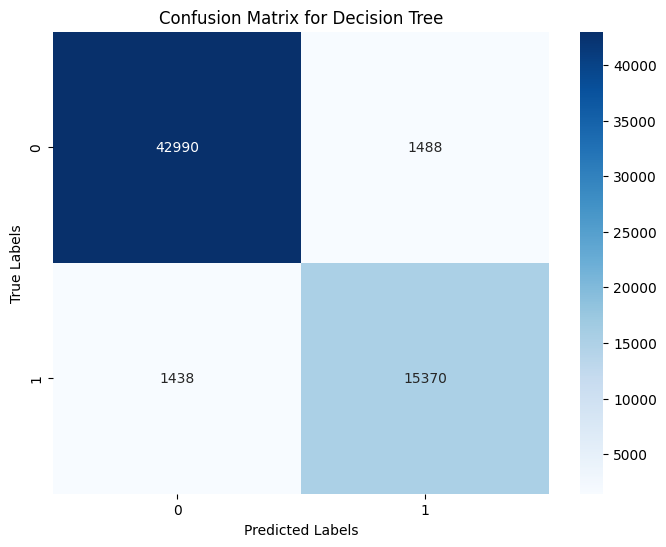

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# ----------------------------------------------------------------------------

<h1><b> |--> K-Nearest Neighbors Classifier <--| </b></h1>


# ----------------------------------------------------------------------


<h2>Train K-Nearest Neighbors Classifier </h2>


In [34]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

<h2> Evaluate KNN

In [35]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix =confusion_matrix[y_test, y_pred_dt]

<h2> Print Evaluate KNN

In [36]:
print("\n --> K-Nearest Neighbors Metrics: <-- ")
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("confusion_matrix:", confusion_matrix)



 --> K-Nearest Neighbors Metrics: <-- 
Accuracy: 0.8709982704043338
Recall: 0.7517253688719657
F1 Score: 0.7616952013503737
confusion_matrix: [[42990  1488]
 [ 1438 15370]]


<h2> Draw Confusion Matrix for K-Nearest Neighbors Classifier

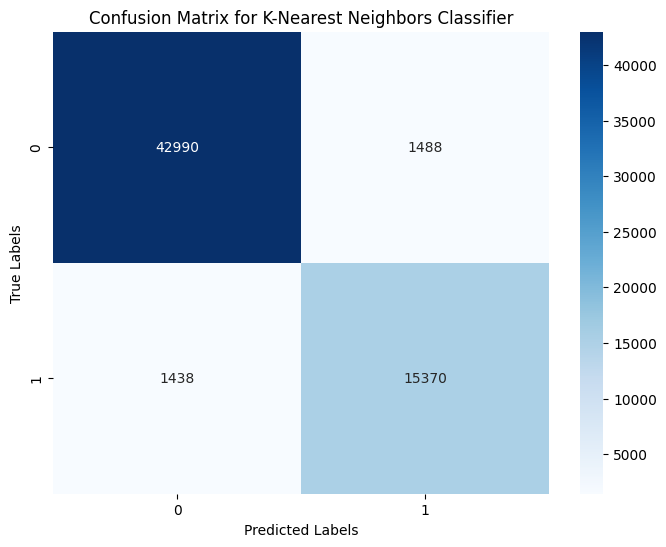

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
plt.show()

# ----------------------------------------------------------------------------

<h1> <b> |--> Random Forest Classifier <--|

# -------------------------------------------------------------


<h2>Train Random Forest Classifier

In [38]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<h2> Predict on test data

In [39]:
y_pred_rf = model_rf.predict(X_test)

<h2> Evaluate Random Forest

In [40]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix =confusion_matrix[y_test, y_pred_dt]

<h2> Print Evaluate Random Forest

In [41]:
print("\n --> Random Forest Metrics: <-- ")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("confusion_matrix:", confusion_matrix)


 --> Random Forest Metrics: <-- 
Accuracy: 0.957690173938583
Recall: 0.9196216087577345
F1 Score: 0.9226131853045633
confusion_matrix: [[42990  1488]
 [ 1438 15370]]


<h2> Draw Confusion Matrix for Random Forest Classifier

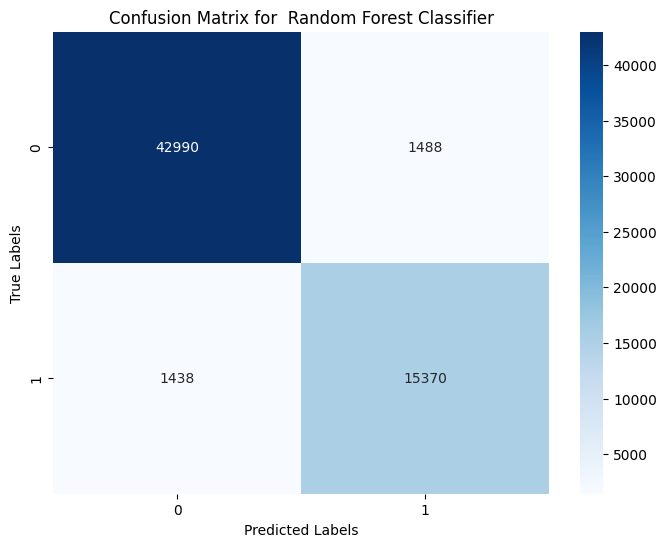

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for  Random Forest Classifier')
plt.show()

<h2> Test on a new sample

In [43]:
data_rf = model_rf.predict([[2024, 200, 10, 7]])
print('safe' if data_rf[0] == 0 else 'risk')

safe


c:\Users\Bright Star\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# ----------------------------------------------------------------------------

<h1> <b> |--> Logistic Regression <--|

# -------------------------------------------------------------


<h2> Train Logistic Regression Classifier

In [ ]:
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<h2> Predict on test data

In [ ]:
y_pred_lr = model_lr.predict(X_test)

<h2>  Logistic Regression


In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix [y_test, y_pred_dt]

<h2> Print Evaluate Logistic Regression


In [ ]:
print("\n --> Logistic Regression: <-- ")
print("Accuracy:", accuracy_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("confusion_matrix:", confusion_matrix)




 --> Logistic Regression: <-- 
Accuracy: 0.9202917468916229
Recall: 0.6929133858267716
F1 Score: 0.7701500964569707
confusion_matrix: [[48569   906]
 [  848 10963]]


<h2> Test on a new sample

In [ ]:
data_lr = model_lr.predict([[2024, 200, 10, 7]])
print('safe' if data_lr[0] == 0 else 'risk')

safe


c:\Users\Bright Star\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ----------------------------------------------------------------------------

<h1> <b> |--> Naive Bayes <--|


# -------------------------------------------------------------


<h2> Naive Bayes

In [ ]:
model_nb = GaussianNB()

In [ ]:
model_nb.fit(X_train, y_train)

GaussianNB()

<h2> Predict on test data

In [ ]:
y_pred = model_nb.predict(X_test)

<h2>  Evaluate Logistic Regression


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix[y_test, y_pred]
class_report = classification_report(y_test, y_pred)

<h2>  Print Evaluate Logistic Regression


In [ ]:
print("\n --> Naive Bayes: <-- ")
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


 --> Naive Bayes: <-- 
Accuracy: 0.9169141402604184
Confusion Matrix:
[48569 10963 48569 ... 48569 48569 48569]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     49475
           1       0.89      0.65      0.75     11811

    accuracy                           0.92     61286
   macro avg       0.91      0.81      0.85     61286
weighted avg       0.92      0.92      0.91     61286



<h2> Test on a new sample

In [ ]:
data_nb = model_nb.predict([[2024, 200, 10, 7]])
print('safe' if data_lr[0] == 0 else 'risk')

safe


c:\Users\Bright Star\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
